# Results for TENCON 2024 paper
## Experiment 1: Algorithm Performance Comparison

#### Title: Performance Analysis of Selected Swarm-based Robot Search Algorithms for Target Tracking 

#### Authors:

Christian C. Anabeza,
Marck Herzon C. Barrion,
Matthea Flynne T. Sim,
Argel A. Bandala

## Accuracy across Algorithms

                        count      mean       std       min       25%  \
Algorithm                                                               
Brownian Motion          20.0  0.828674  0.581945  0.227273  0.489583   
Correlated Random Walk   20.0  0.753592  0.423681  0.090388  0.372805   
Levy Flight              11.0  0.657641  0.276169  0.379894  0.456503   
Random Walk              10.0  0.489135  0.131732  0.302358  0.370105   

                             50%       75%       max  
Algorithm                                             
Brownian Motion         0.639881  0.837879  2.388889  
Correlated Random Walk  0.787926  1.013376  1.737778  
Levy Flight             0.568663  0.800795  1.272478  
Random Walk             0.514595  0.606923  0.622858  


/tmp/ipykernel_16382/3360800215.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Algorithm', y='Accuracy', data=df, palette=pastel_palette)


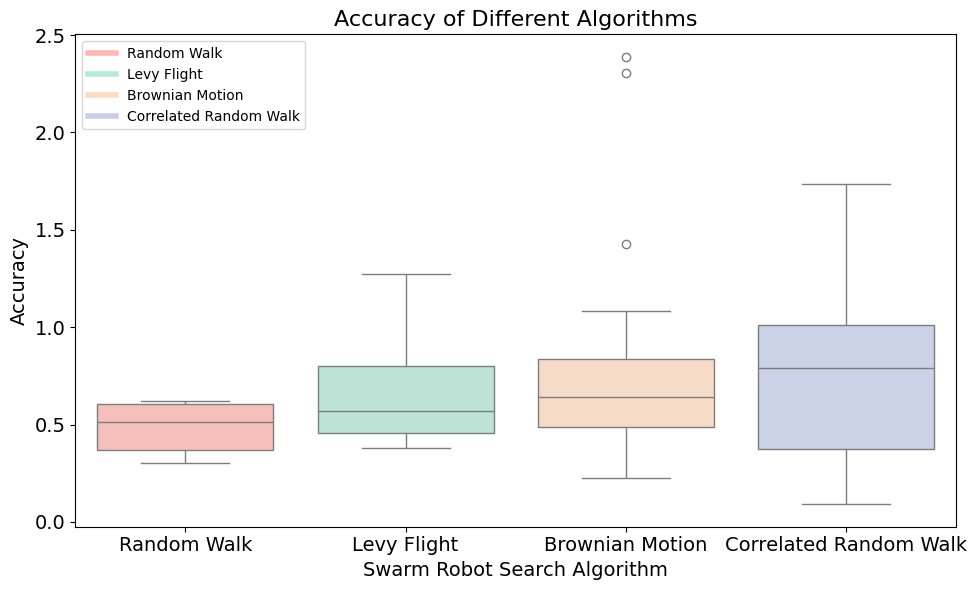

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to read accuracy data from a given directory
def read_accuracy_data(base_dir, actual_black_tiles, skip_lines=False):
    accuracies = []
    run_dirs = sorted(os.listdir(base_dir))

    for run_dir in run_dirs:
        run_path = os.path.join(base_dir, run_dir, 'e-puck.csv')
        if os.path.isfile(run_path):
            try:
                if skip_lines:
                    df = pd.read_csv(run_path, skip_blank_lines=True)
                else:
                    df = pd.read_csv(run_path)

                final_average_count = df['average_count'].iloc[-1]
                accuracy = final_average_count / actual_black_tiles
                accuracies.append(accuracy)
            except Exception as e:
                print(f"Error reading {run_path}: {e}")
    
    return accuracies

# Base directories for each algorithm
directories = {
    "Random Walk": "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets",
    "Levy Flight": "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_20targets",
    "Brownian Motion": "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_20targets",
    "Correlated Random Walk": "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_20targets"
}

# Actual number of black tiles
actual_black_tiles = 20

# Collect accuracy data for each algorithm
data = []

for algorithm, dir_path in directories.items():
    if algorithm in ["Random Walk", "Levy Flight"]:
        accuracies = read_accuracy_data(dir_path, actual_black_tiles, skip_lines=True)
    else:
        accuracies = read_accuracy_data(dir_path, actual_black_tiles, skip_lines=False)
    
    for accuracy in accuracies:
        data.append({"Algorithm": algorithm, "Accuracy": accuracy})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Print descriptive statistics
descriptive_stats = df.groupby('Algorithm')['Accuracy'].describe()
print(descriptive_stats)

# Define a pastel color palette
pastel_palette = {
    "Random Walk": "#FFB7B2",  # Light pink
    "Levy Flight": "#B5EAD7",  # Light mint green
    "Brownian Motion": "#FFDAC1",  # Light peach
    "Correlated Random Walk": "#C7CEEA"  # Light lavender
}

# Plotting the accuracies using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Algorithm', y='Accuracy', data=df, palette=pastel_palette)
plt.title('Accuracy of Different Algorithms', fontsize=16)
plt.xlabel('Swarm Robot Search Algorithm', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Add legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in pastel_palette.values()]
labels = pastel_palette.keys()
plt.legend(handles, labels, title='', loc='upper left', fontsize=10)

plt.tight_layout()

# Save the figure
plt.savefig('/home/herzon/results-thesis/subthesis-3/final_plots/1_results.png', format='png', dpi=1200)

plt.show()
